**2. 서포트 벡터가 무엇인가요?**

**답** : SVM 분류기의 결정 경계(도로 경계)에 위치한 샘플

도로 경계에 위치한 샘플에 의해 전적으로 결정되는데 이러한 샘플을 서포트 벡터라고 한다. 도로 바깥쪽에 샘플을 더 추가해도 결정 경계에는 아무런 영향을 미치지 않는다.

(교재 206p)


**3. SVM을 사용할 때 입력값의 스케일이 왜 중요한가요?**

**답** : SVM은 특성의 스케일에 민감하기 때문이다.

만약 수직축의 스케일이 수평축의 스케일보다 훨씬 크게 되면 가장 넓은 도로가 거의 수평에 가깝게 된다. 

특성의 스케일을 조정하면(사이킷런의 StandardScaler 등을 사용하여) 결정 경계가 훨씬 좋아지므로,  입력값의 스케일이 중요하다.

(교재 206p)

**8. 선형적으로 분리되는 데이터셋에 LinearSVC를 훈련시켜보세요. 그런 다음 같은 데이터셋에 SVC와 SGDClassifier를 적용해보세요. 거의 비슷한 모델이 만들어지는지 확인해보세요.**

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [19]:
# iris data를 로드하고 x,y를 지정해줍니다.
#(힌트: 핸즈온 머신러닝 교재 208쪽 참고)

iris= datasets.load_iris()
X = iris['data'][:,(2,3)] 
y = iris['target']

setosa_or_versicolor = (y==0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [20]:
C = 5 
alpha = 1 / (C * len(X))

In [21]:
# LinearSVC 학습하기

lin_svc = LinearSVC(loss='hinge',C=C,random_state=42)
svc = SVC(kernel='linear',C=C)
sgd_clf = SGDClassifier(loss='hinge', learning_rate = 'constant', eta0=0.001, tol=1e-3,alpha=alpha,
                       max_iter=100000, random_state=42)

In [22]:
# 위를 이용하여 데이터 스케일링 후 LinearSVC, SVC, SGDClassifier 구하기

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LinearSVC 
lin_svc.fit(X_scaled, y)

# SVC
svc.fit(X_scaled, y)

# LinearSVC 
sgd_clf.fit(X_scaled, y)

SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
print('LinearSVC :', lin_svc.intercept_, lin_svc.coef_)
print('SVC :', svc.intercept_, svc.coef_)
print('SGDClassifier :', sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC : [0.28474272] [[1.05364736 1.09903308]]
SVC : [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier : [0.117] [[0.77714169 0.72981762]]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44867 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51086 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44600 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_

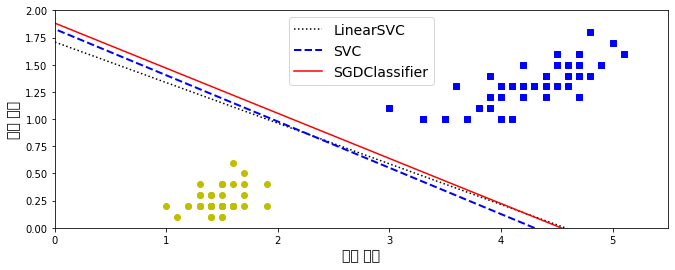

In [35]:
# 세 개 모델의 결정 경계를 그리기
# 먼저 결정 경계들의 기울기(W)와 편향(b)을 구함

w1 = -lin_svc.coef_[0,0] / lin_svc.coef_[0,1]
b1 = -lin_svc.intercept_[0] / lin_svc.coef_[0,1]
w2 = -svc.coef_[0, 0]/svc.coef_[0, 1]
b2 = -svc.intercept_[0]/svc.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# 결정 경계를 원본 스케일로 변환하기 (3개 모델의 범위를 같게 하기 위해)
line1 = scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2 = scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3 = scaler.inverse_transform([[-10,-10*w3+b3],[10,10*w3+b3]])

# 세 개의 결정 경계를 모두 그리자
plt.figure(figsize=(11,4))
plt.plot(line1[:,0], line1[:,1], "k:",label="LinearSVC")
plt.plot(line2[:,0],line2[:,1],"b--",linewidth=2,label="SVC")
plt.plot(line3[:,0],line3[:,1],'r-',label="SGDClassifier")

plt.plot(X[:,0][y==1],X[:,1][y==1], 'bs')
plt.plot(X[:,0][y==0],X[:,1][y==0],'yo')

plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 너비",fontsize=14)
plt.legend(loc='upper center',fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

# 아주 비슷한 결정 경계를 보인다. 

In [ ]:
# 너무 어려울 경우 https://leechamin.tistory.com/83 참고 